In [1]:
import xarray as xr

In [7]:
file_path = 'C:\\Users\\brdera001\\Downloads\\parcels_tutorials\\test_sep_22_cop.nc'

In [8]:
ds = xr.open_dataset(file_path)

In [12]:
ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 601, time: 8, longitude: 841)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 -40.0 -39.92 -39.83 ... 9.833 9.917 10.0
  * time       (time) datetime64[ns] 2022-09-01T12:00:00 ... 2022-09-08T12:00:00
  * longitude  (longitude) float32 -50.0 -49.92 -49.83 ... 19.83 19.92 20.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/13)
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    title:             daily mean fields from Global Ocean Physics Analysis a...
    area:              Global
    Conventions:       CF-1.8
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    ...                ...
    source:            MOI GLO12
    licence:           http://marine.copernicus.eu/services-portfolio/service...
    institution:       Mercator Ocean International
    _CoordSysBuilder:  ucar.nc2.dataset.conv.CF1Convention
    comment:           
    history:           Data extracted from dataset http://localhost:8080/thre...

C:\Users\brdera001\AppData\Local\miniconda3\envs\py3_parcels\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


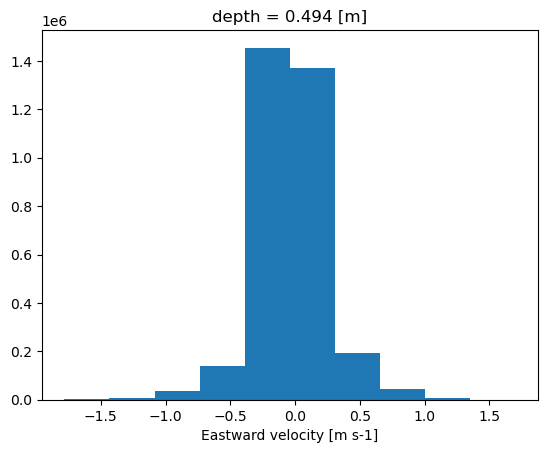

In [9]:
# Access a specific variable (e.g., ocean current velocity in u-direction)
uo_data = ds['uo']

# Slice the data to a specific time range
time_range = slice('2022-09-01', '2022-09-08')
uo_subset = uo_data.sel(time=time_range)

# Plot the data using xarray's built-in plotting capabilities
uo_subset.plot()

# Calculate mean and standard deviation
mean_uo = uo_subset.mean(dim='time')
std_uo = uo_subset.std(dim='time')

In [33]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleSet,
    Variable,
    download_example_dataset,
)

In [34]:
ds = 'C:\\Users\\brdera001\\Downloads\\parcels_tutorials\\test_sep_22_cop.nc'

In [42]:
filenames = {
    "U": f"{ds}",
    "V": f"{ds}",
}

In [45]:
variables = {
    "U": "uo",
    "V": "vo",
}

dimensions = {'lon': 'longitude', 'lat': 'latitude', "time": "time"}

In [52]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

In [59]:
pset = ParticleSet.from_line(
    fieldset=fieldset,
    pclass=JITParticle,
    size=5,  # releasing 5 particles
    start=(-33, -8),  # releasing on a line: the start longitude and latitude
    finish=(-34.5, -8),  # releasing on a line: the end longitude and latitude
)

In [60]:
output_file = pset.ParticleFile(
    name="GlobCurrentParticles.zarr", outputdt=timedelta(hours=6)
)
pset.execute(
    AdvectionRK4,
    runtime=timedelta(days=10),
    dt=timedelta(minutes=5),
    output_file=output_file,
)

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> C:\Users\BRDERA~1\AppData\Local\Temp\parcels-tmp\libcfe9f46c71218e6507599e50811d9179_0.dll
INFO: Output files are stored in GlobCurrentParticles.zarr.
100%|█████████████████████████████████████████████████████████████████| 864000.0/864000.0 [00:00<00:00, 1097581.29it/s]


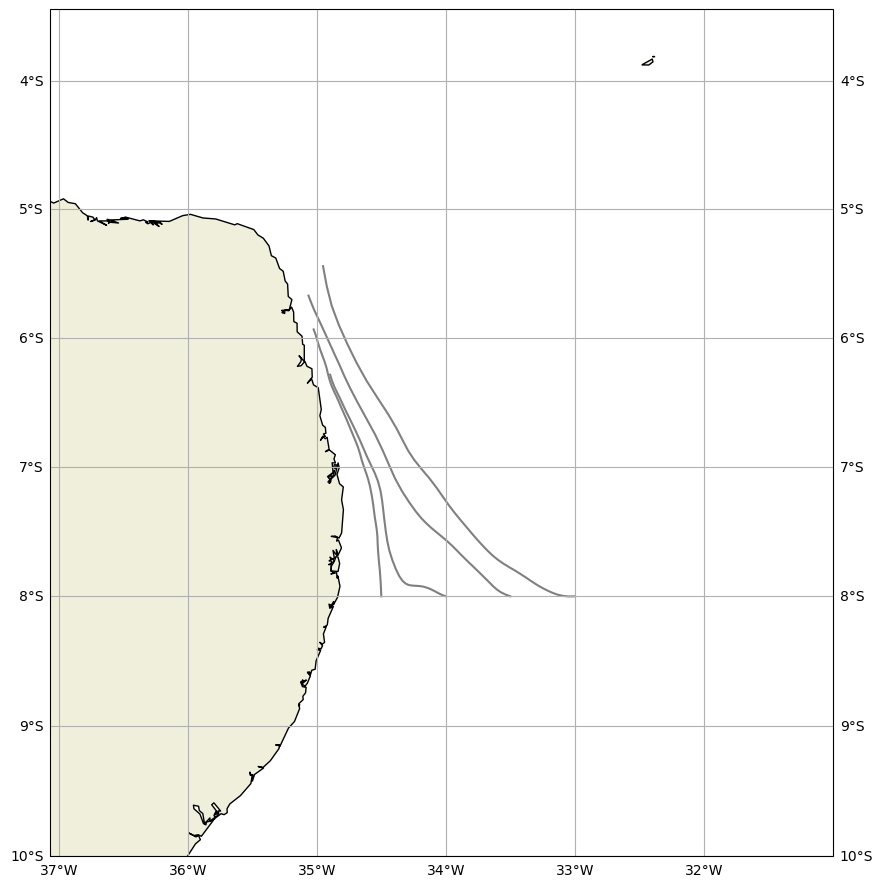

In [58]:
ds = xr.open_zarr("GlobCurrentParticles.zarr")
ds.traj.plot(margin=2)
plt.show()

In [28]:
from parcels import FieldSet
# Create the OceanParcels FieldSet using FieldSet.from_netcdf()
fieldset = FieldSet.from_netcdf(file_path, allow_time_extrapolation=True)

TypeError: FieldSet.from_netcdf() missing 2 required positional arguments: 'variables' and 'dimensions'

In [23]:
import xarray as xr
from parcels import FieldSet, Field

# Extract the U and V velocity components from the xarray Dataset
# Replace 'uo' and 'vo' with the actual names of the U and V velocity variables in your dataset
u_vel = ds['uo']
v_vel = ds['vo']


In [27]:
# Transpose the velocity data arrays to the correct shape [tdim, ydim, xdim]
# If your data is not in the correct shape, use the appropriate method to transpose it.
u_vel_transposed = u_vel.transpose('time', 'latitude', 'longitude')
v_vel_transposed = v_vel.transpose('time', 'latitude', 'longitude')

ValueError: ('time', 'latitude', 'longitude') must be a permuted list of ('time', 'depth', 'latitude', 'longitude'), unless `...` is included

In [15]:
# Define the `variables` dictionary for the FieldSet creation
variables = {'U': u_vel, 'V': v_vel}

# Define the `dimensions` dictionary for the FieldSet creation
# Replace 'lon' and 'lat' with the actual names of the longitude and latitude dimensions in your dataset
dimensions = {'lon': 'longitude', 'lat': 'latitude'}

In [17]:
# Convert the xarray DataArrays to numpy arrays
u_vel_np = u_vel.values
v_vel_np = v_vel.values

In [20]:
# Define the `data` dictionary for the FieldSet creation
data = {'U': u_vel.values, 'V': v_vel.values}

In [21]:
# Create the OceanParcels FieldSet using data arrays
fieldset = FieldSet.from_data_arrays(data, dimensions)

AttributeError: type object 'FieldSet' has no attribute 'from_data_arrays'

In [10]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4

In [11]:
# Create the OceanParcels FieldSet using the xarray Dataset

fieldset = FieldSet.from_xarray_dataset(ds, time_periodic=True)

TypeError: FieldSet.from_xarray_dataset() missing 2 required positional arguments: 'variables' and 'dimensions'